<a href="https://colab.research.google.com/github/dishashetty28/googlecolab/blob/main/Cartooning_an_Image_using_OpenCV_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

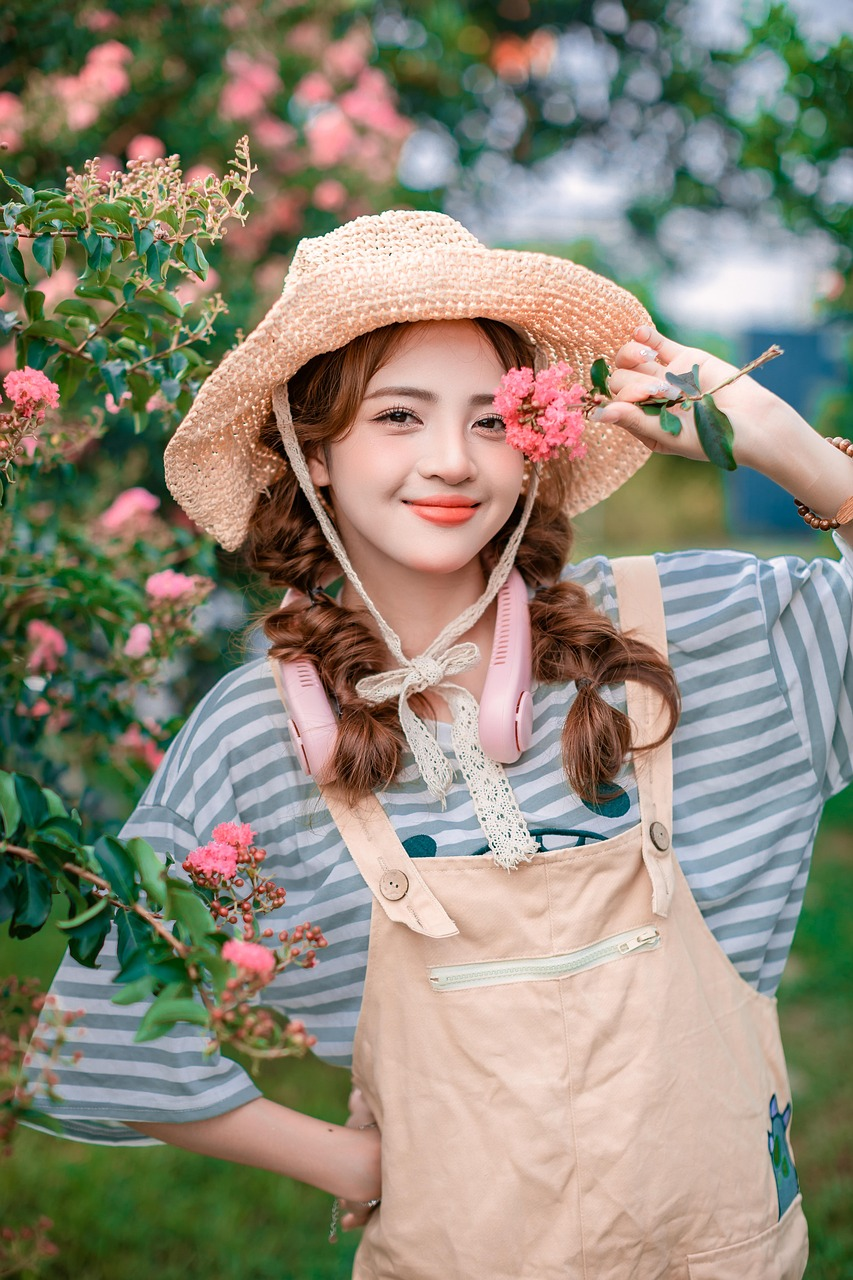

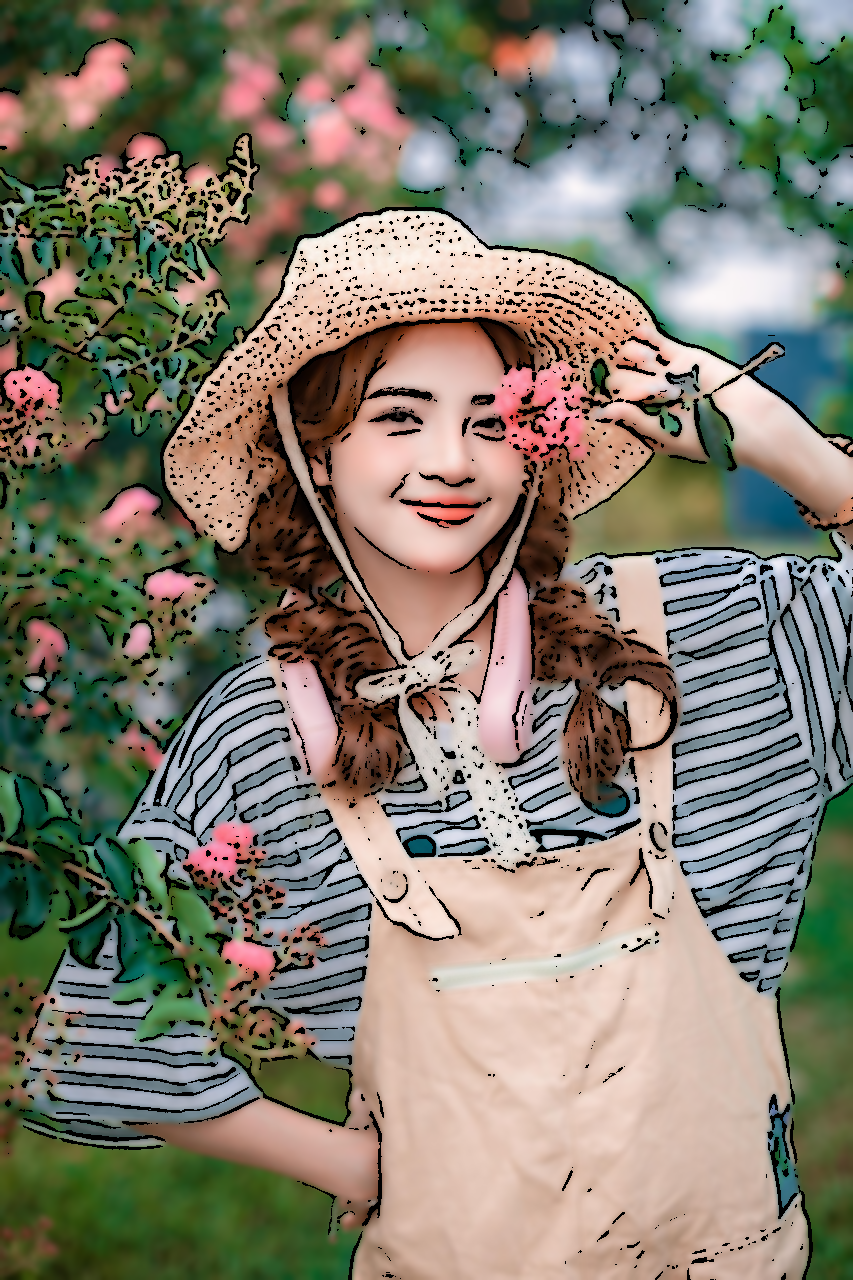

In [10]:
import cv2
from google.colab.patches import cv2_imshow

# Read the image
image = cv2.imread('women.jpg')

# Step 1: Apply bilateral filter to smooth the image and reduce the number of colors
color_image = cv2.bilateralFilter(image, d=9, sigmaColor=300, sigmaSpace=300)

# Step 2: Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 3: Apply median blur to the grayscale image to reduce noise
gray_image = cv2.medianBlur(gray_image, 5)

# Step 4: Detect edges using adaptive thresholding
edges = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                              cv2.THRESH_BINARY, blockSize=9, C=9)

# Step 5: Combine the edges with the color image to create the cartoon effect
cartoon_image = cv2.bitwise_and(color_image, color_image, mask=edges)

# Display the original and cartoon images
cv2_imshow(image)           # Display original image
cv2_imshow(cartoon_image)   # Display cartoon image


In [13]:
import cv2

# Load the pre-trained Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Initialize the camera (0 for default camera)
cap = cv2.VideoCapture(0)

# Check if the camera opened successfully
if not cap.isOpened():
    print("Error: Could not access the camera.")
else:
    while True:
        # Capture frame-by-frame
        ret, frame = cap.read()

        # Check if frame was successfully captured
        if not ret:
            print("Error: Failed to capture frame.")
            break

        # Convert the frame to grayscale (face detection works better on grayscale)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces in the image
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        # Draw rectangles around the faces
        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Green rectangle

        # Display the frame with the detected faces
        cv2.imshow('Real-Time Face Detection', frame)

        # Press 'q' to exit the loop
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the camera and close all OpenCV windows
    cap.release()
    cv2.destroyAllWindows()


Error: Could not access the camera.
